In [2]:
import torch
from time import time
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt
from zipfile import ZipFile
import numpy as np
from time import time
from torchvision import datasets
from torchvision import transforms
import pandas as pd
import re
import numpy as np
import zipfile
import os
from PIL import Image
from torchvision.io import read_image
from matplotlib import image

In [126]:
print(torch.cuda.device_count())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(torch.cuda.current_device()))
print(torch.cuda.is_available())

1
0
NVIDIA GeForce GTX 1050 Ti
True


In [127]:
class MyDataset(Dataset):
    def __init__(self, anno_dir,image_dir,transform=None, target_transform=None):
        self.anno_dir = anno_dir
        self.image_dir = image_dir
        self.transform = transform
        self.target_transform = target_transform
        
    def __getitem__(self, index):
        anno=[os.path.join(self.anno_dir, f) for f in os.listdir(self.anno_dir) if 'exp' in f]
        images=[os.path.join(self.image_dir , f) for f in os.listdir(self.image_dir )]
        anno.sort(key=lambda f: int(re.sub('\D', '', f)))
        images.sort(key=lambda f: int(re.sub('\D', '', f)))
        y=torch.tensor(int(np.load(anno[index])),dtype=torch.float32)
        x=image.imread(images[index])
        if self.transform:
            x = self.transform(x)
        if self.target_transform:
            y = self.target_transform(y)
        return x,y
    
    def __len__(self):
        return len(os.listdir(self.image_dir))

In [130]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
transform = transforms.Compose([transforms.ToTensor(),normalize])
target_transform=transforms.Compose([transforms.ToTensor()])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


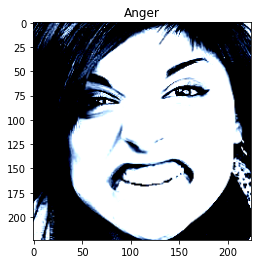

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


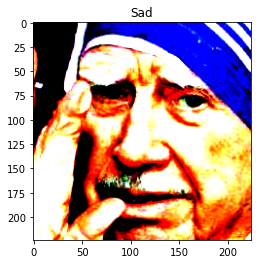

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


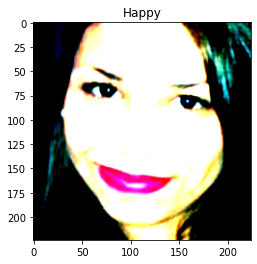

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


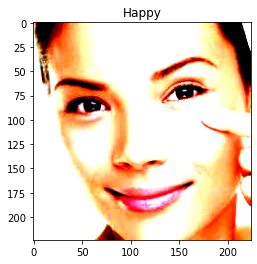

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


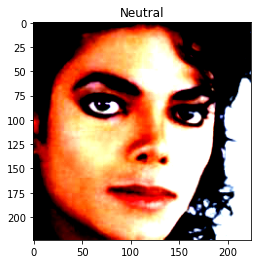

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


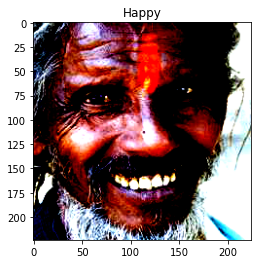

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


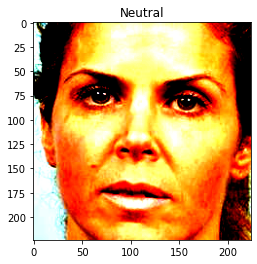

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


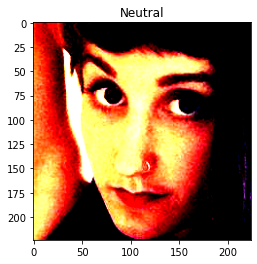

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


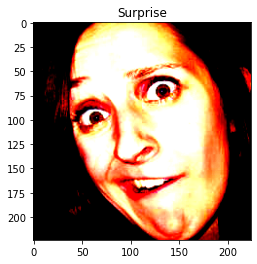

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


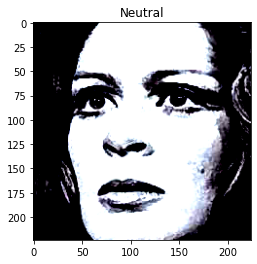

In [135]:
anno_dir=r"F:\Affectnet\annotations"
image_dir=r"F:\Affectnet\train_set\train_set\images"
train_data=MyDataset(anno_dir,image_dir,transform=transform, target_transform=None)
classes=['Neutral','Happy','Sad','Surprise','Fear','Disgust','Anger','Contempt']
x,y=train_data[0]
for i in range(10,20):
    imag,label=train_data[i]
    plt.title(classes[int(label)])
    plt.imshow(imag.permute(1,2,0))
    plt.show()

In [7]:
anno_dir=r"F:\Affectnet\annotations"
image_dir=r"F:\Affectnet\train_set\train_set\images"
index=92
anno=[os.path.join(anno_dir, f) for f in os.listdir(anno_dir) if 'exp' in f]
images=[os.path.join(image_dir, f) for f in os.listdir(image_dir)]
value=np.array(int(np.load(anno[index])))
image1=image.imread(images[index])
anno.sort(key=lambda f: int(re.sub('\D', '', f)))
images.sort(key=lambda f: int(re.sub('\D', '', f)))



In [9]:
for i in anno:
    print(i)
    break

F:\Affectnet\annotations\0_exp.npy


In [10]:
[torch.tensor(int(np.load(i)),dtype=torch.float32) for i in anno]

KeyboardInterrupt: 

['F:\\Affectnet\\annotations\\0_exp.npy',
 'F:\\Affectnet\\annotations\\1_exp.npy',
 'F:\\Affectnet\\annotations\\2_exp.npy',
 'F:\\Affectnet\\annotations\\3_exp.npy',
 'F:\\Affectnet\\annotations\\5_exp.npy',
 'F:\\Affectnet\\annotations\\7_exp.npy',
 'F:\\Affectnet\\annotations\\10_exp.npy',
 'F:\\Affectnet\\annotations\\13_exp.npy',
 'F:\\Affectnet\\annotations\\15_exp.npy',
 'F:\\Affectnet\\annotations\\16_exp.npy',
 'F:\\Affectnet\\annotations\\18_exp.npy',
 'F:\\Affectnet\\annotations\\21_exp.npy',
 'F:\\Affectnet\\annotations\\22_exp.npy',
 'F:\\Affectnet\\annotations\\23_exp.npy',
 'F:\\Affectnet\\annotations\\27_exp.npy',
 'F:\\Affectnet\\annotations\\28_exp.npy',
 'F:\\Affectnet\\annotations\\29_exp.npy',
 'F:\\Affectnet\\annotations\\32_exp.npy',
 'F:\\Affectnet\\annotations\\33_exp.npy',
 'F:\\Affectnet\\annotations\\34_exp.npy',
 'F:\\Affectnet\\annotations\\36_exp.npy',
 'F:\\Affectnet\\annotations\\38_exp.npy',
 'F:\\Affectnet\\annotations\\39_exp.npy',
 'F:\\Affectnet\\